## Exercise 9

In this exercise we are going to build a decision tree using scikit-learn and pandas. Code some stuff yourself, or find the available modules that can do it for you:

In [1]:
import pandas as pd
import numpy as np

# Read csv with pandas, index indicates whether the first column is an index
data = pd.read_csv("attrition.csv", index_col=0)

y = data['Attrition']
X = data.drop('Attrition', axis=1)

Write the pre-processing functions:

In [2]:
# Create training and test set with function
from sklearn.model_selection import train_test_split

def splitDataset(X, y, ratio):
    return train_test_split(X, y, train_size = ratio)

In [3]:
# Convert all attributes in data dataframe
from sklearn.preprocessing import LabelEncoder

def convertAttribute(column):
    enc = LabelEncoder()
    return enc.fit_transform(column)

The pre-processsing:

In [4]:
# convert all categorical attributes
for column in X.columns:
    X[column] = convertAttribute(X[column])

y = convertAttribute(y)

# Use our new function to split according to a certain ratio
train_X, test_X, train_y, test_y = splitDataset(X, y, 0.7)

Build decision tree and calculate accuracy:

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build tree
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree.fit(train_X, train_y)

## Use tree for prediction
y_pred = dec_tree.predict(test_X)

accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.7777777777777778


## AUC

In [6]:
##Some other metrics:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(test_y, y_pred)
print(auc)

0.5933265582655827


## ROC curve

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

     |████████████████████████████████| 13.2MB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 122kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.8MB/s  eta 0:00:01


[2 1 0]


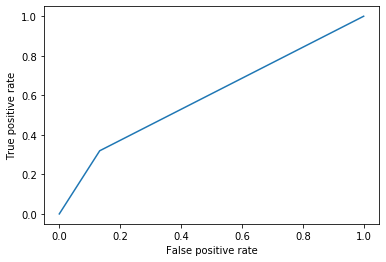

In [9]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
print(thresholds)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()